In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
#import torch
#import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
#import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
#from torchvision import transforms, datasets
import cv2
#from torchvision import transforms, datasets
import pandas as pd
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt



In [2]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/94-phrase-egg.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/2561-phrase-egg.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/1179-phrase-egg.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/1912-phrase-egg.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/932-phrase-egg.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/819-phrase-egg.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [3]:
disorder_audios[0].shape

(32608,)

In [2]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/946-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/1181-phrase.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/1026-phrase.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/876-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/2028-phrase.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/2543-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [22]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/60-phrase-egg.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/79-phrase-egg.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/healthy/phrase/94-phrase-egg.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/101-phrase-egg.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/1325-phrase-egg.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/all_data_egg/pathology/phrase/1671-phrase-egg.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [17]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/60-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/79-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/94-a_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1229-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1325-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1671-a_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



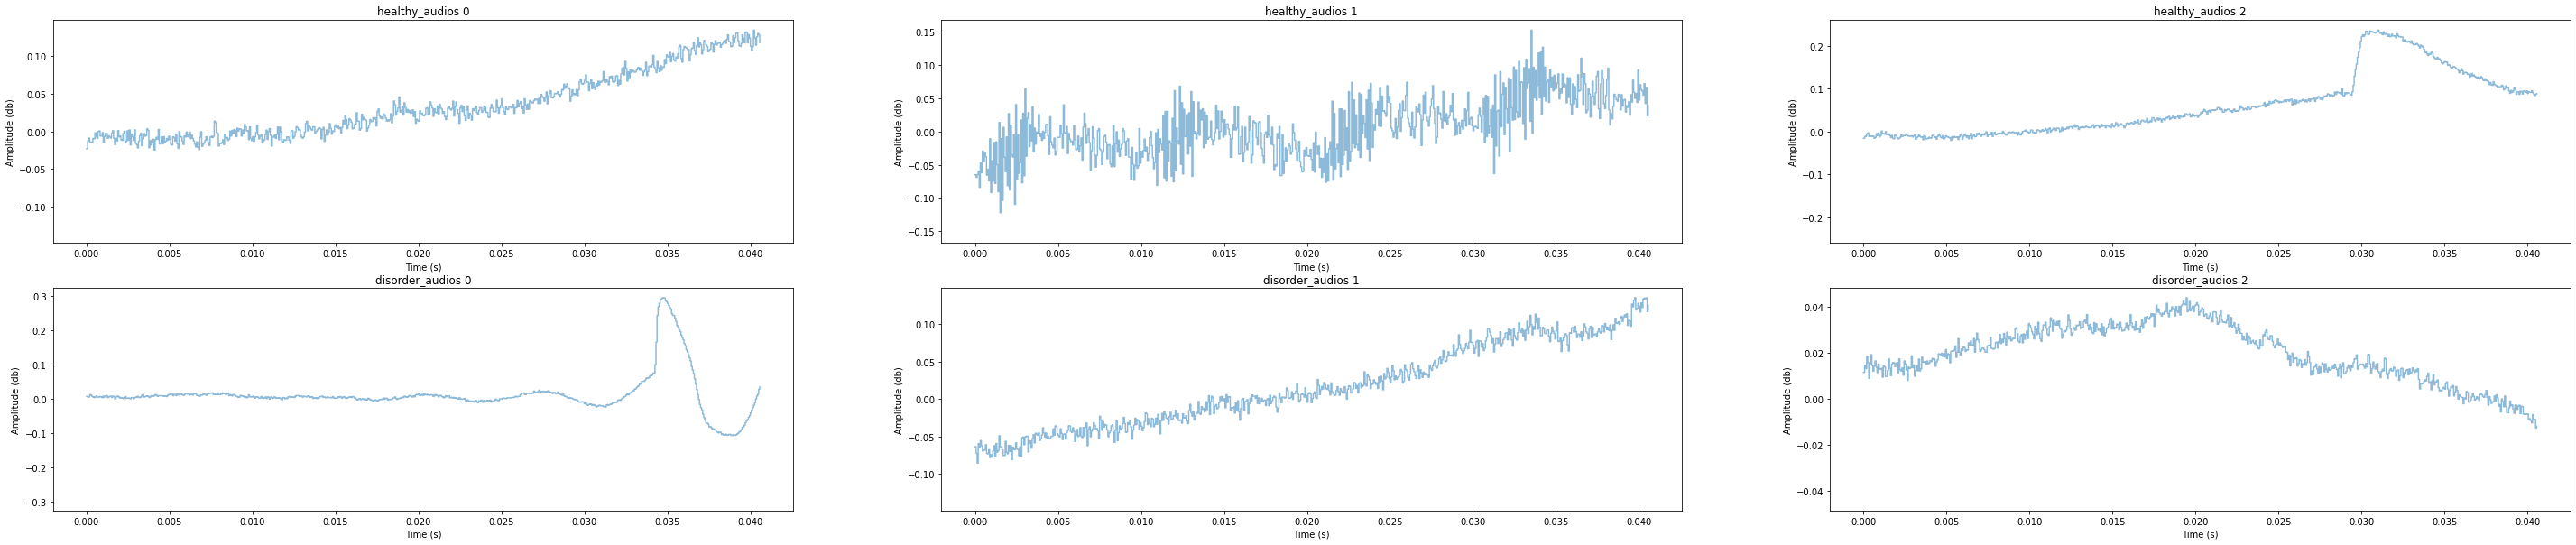

In [4]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    librosa.display.waveshow(healthy_audios[i][500:1150], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    librosa.display.waveshow(disorder_audios[i][500:1150], sr=sr, alpha=0.5)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (db)")
    plt.title("disorder_audios "+str(i))

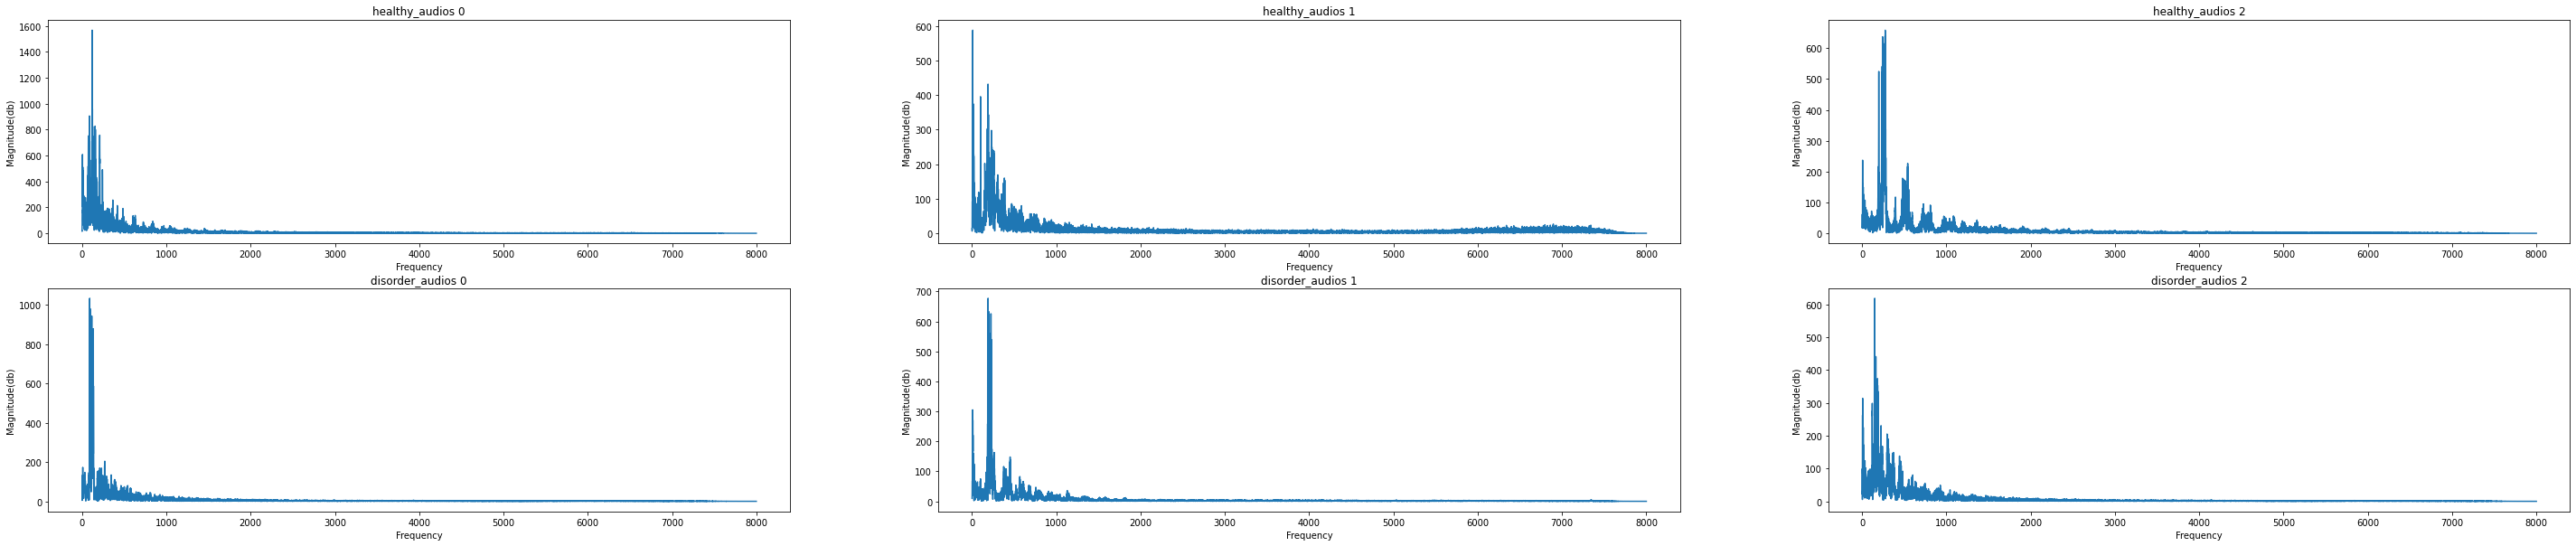

In [5]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    fft = np.fft.fft(healthy_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    fft = np.fft.fft(disorder_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("disorder_audios "+str(i))

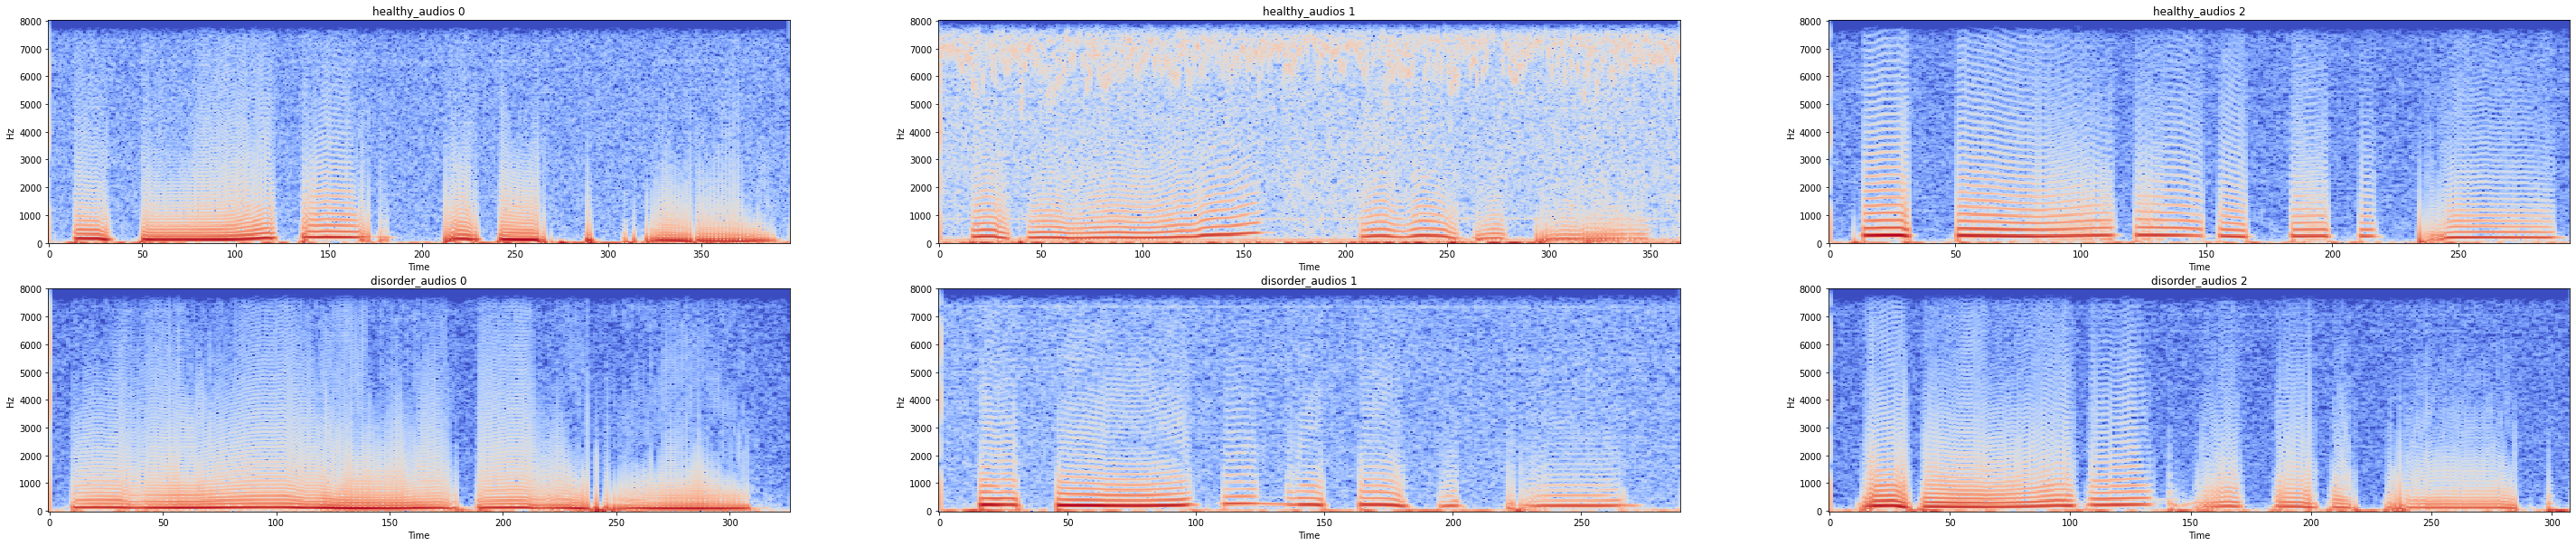

In [6]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    #sr=16000
    win_length =  np.int64(sr/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames',y_axis='linear')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    #sr=16000
    win_length =  np.int64(sr/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='linear')
    plt.xlabel("Time")


    plt.savefig("melspectro_932_egg.png",dpi=500)


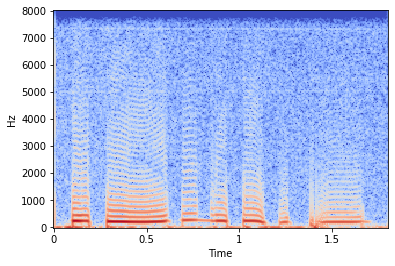

In [16]:
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(disorder_audios[1], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='linear')
plt.xlabel("Time")
plt.savefig("spectro_932_egg.png",dpi=500)

In [ ]:
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[1], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)#[:50,:]

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='linear')
plt.xlabel("Time")
plt.savefig("spectro_2561_egg.png",dpi=500)

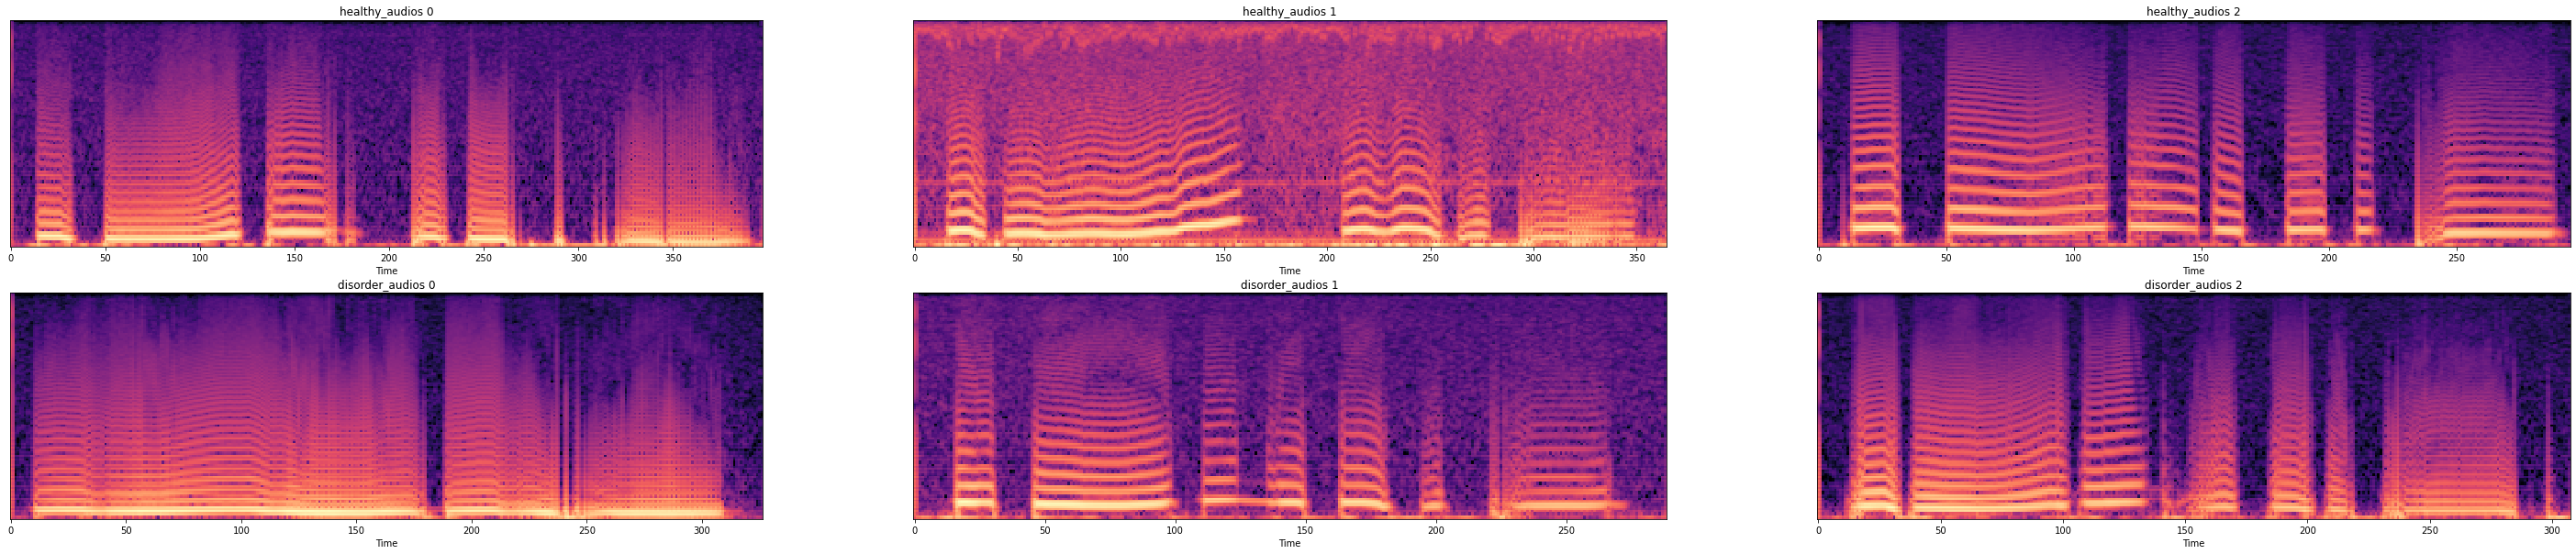

In [7]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

In [37]:
plt.rc('font', size=20)        # 기본 폰트 크기

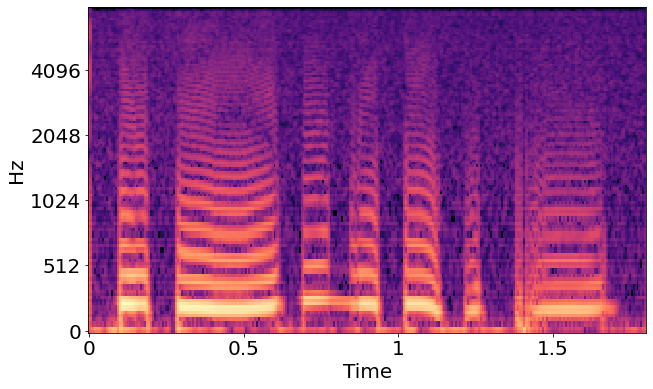

In [39]:
plt.figure(figsize=(10,6))
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(disorder_audios[1], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2

#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='time',y_axis='mel')
plt.xlabel("Time")


plt.savefig("melspectro_932_egg.png",dpi=500)


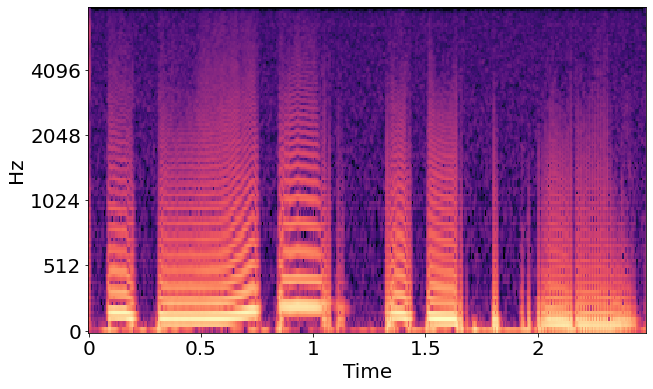

In [40]:
plt.figure(figsize=(10,6))
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[0], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2

#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='time',y_axis='mel')
plt.xlabel("Time")


plt.savefig("melspectro_94_egg.png",dpi=500)


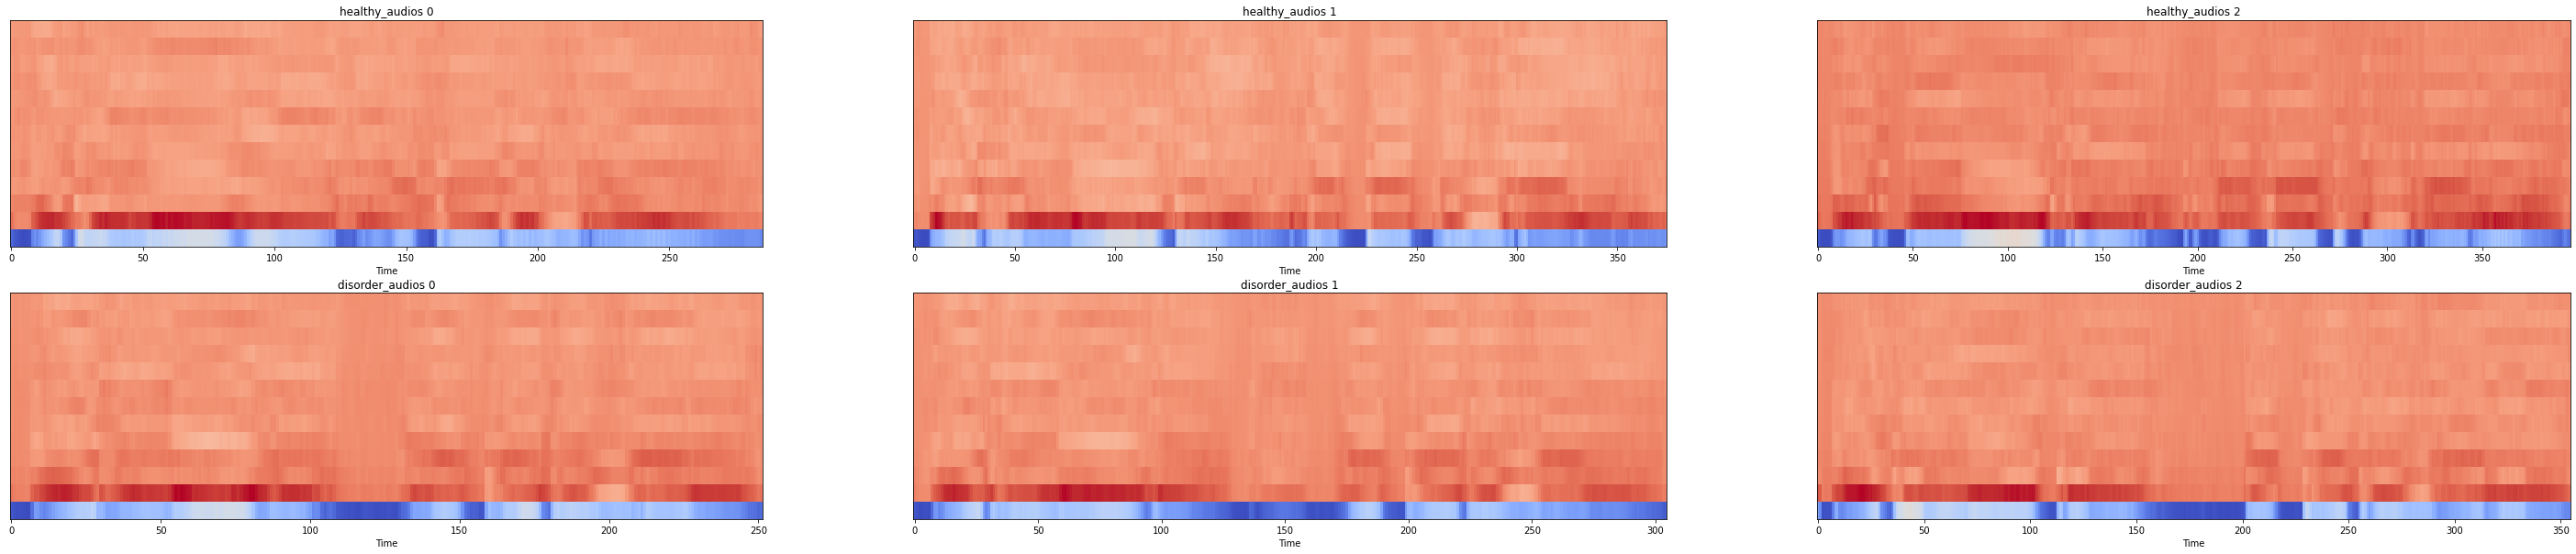

In [13]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=healthy_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    MFCCs = librosa.feature.mfcc(y=disorder_audios[i], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

concat dataset

In [76]:
import torch
concat_audios = []
sr=16000

concat_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1912-a_h.wav')
concat_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/neutral/export/819-a_n.wav')
concat_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/low/export/932-a_l.wav')


concat_audios =[ librosa.load(aud, sr=sr)[0] for aud in concat_audios ]


#length = sr*2 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
#pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
#concat_audios=[pad1d(sig,length) for sig in concat_audios ]

concat_audios=np.concatenate(concat_audios)



In [80]:
concat_audios=torch.tensor(concat_audios)
length = sr*5 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
pad1d = lambda a, i: a[0:i] if a.shape[0] > i else torch.hstack((a, torch.zeros((i-a.shape[0]))))        
concat_audios = pad1d(concat_audios,length)

In [81]:
concat_audios.shape

torch.Size([80000])

Text(0.5, 1.0, 'vowel concat disorder_audios')

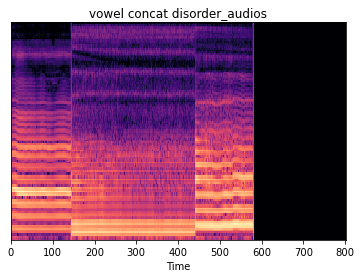

In [82]:
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
concat_audios = concat_audios.numpy()
stft = librosa.stft(concat_audios, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("vowel concat disorder_audios")

# a,i,u spectrum 분석

In [137]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/94-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/2561-a_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/a/high/export/1179-a_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/1912-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/932-a_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/a/high/export/819-a_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



In [133]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000


healthy_audios = []
disorder_audios = []

healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/u/high/export/94-u_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/u/high/export/2561-u_h.wav')
healthy_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/u/high/export/1179-u_h.wav')

disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/u/high/export/1912-u_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/u/high/export/932-u_h.wav')
disorder_audios.append('D:/project/voice_pathology_ai/voice_data/organics_ver2/pathology/u/high/export/819-u_h.wav')


healthy_audios =[ librosa.load(aud, sr=sr)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=sr)[0] for aud in disorder_audios ]



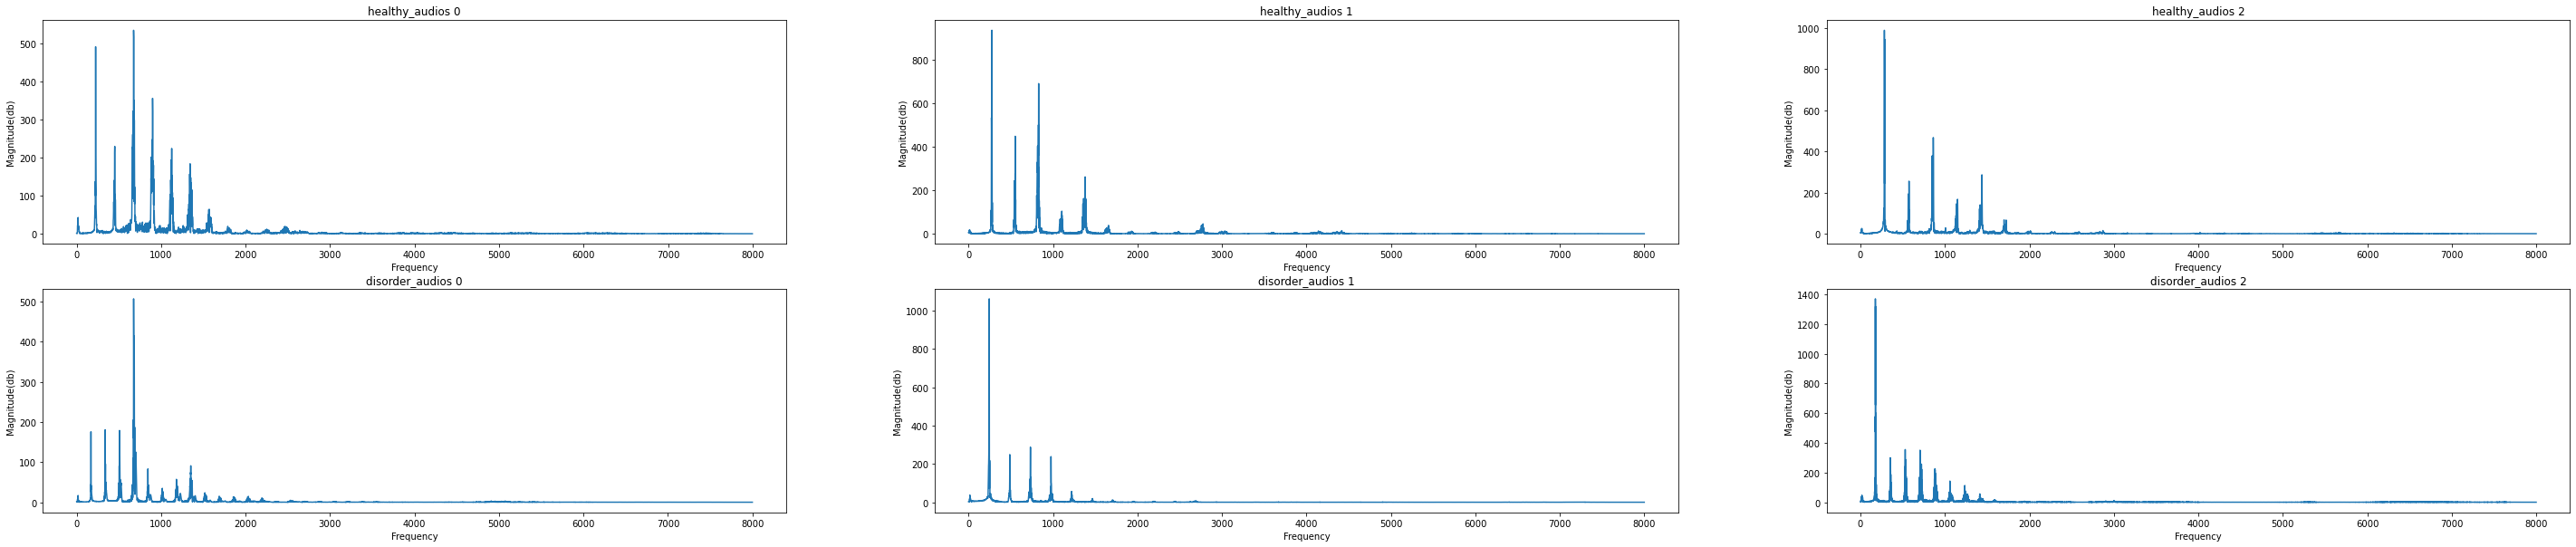

In [138]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    fft = np.fft.fft(healthy_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    fft = np.fft.fft(disorder_audios[i])

    # 복소공간 값 절댓갑 취해서, magnitude 구하기
    magnitude = np.abs(fft) 

    # Frequency 값 만들기
    f = np.linspace(0,sr,len(magnitude))

    # 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
    #left_spectrum = magnitude
    #left_f=f
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]

    plt.plot(left_f, left_spectrum)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude(db)")
    plt.title("disorder_audios "+str(i))

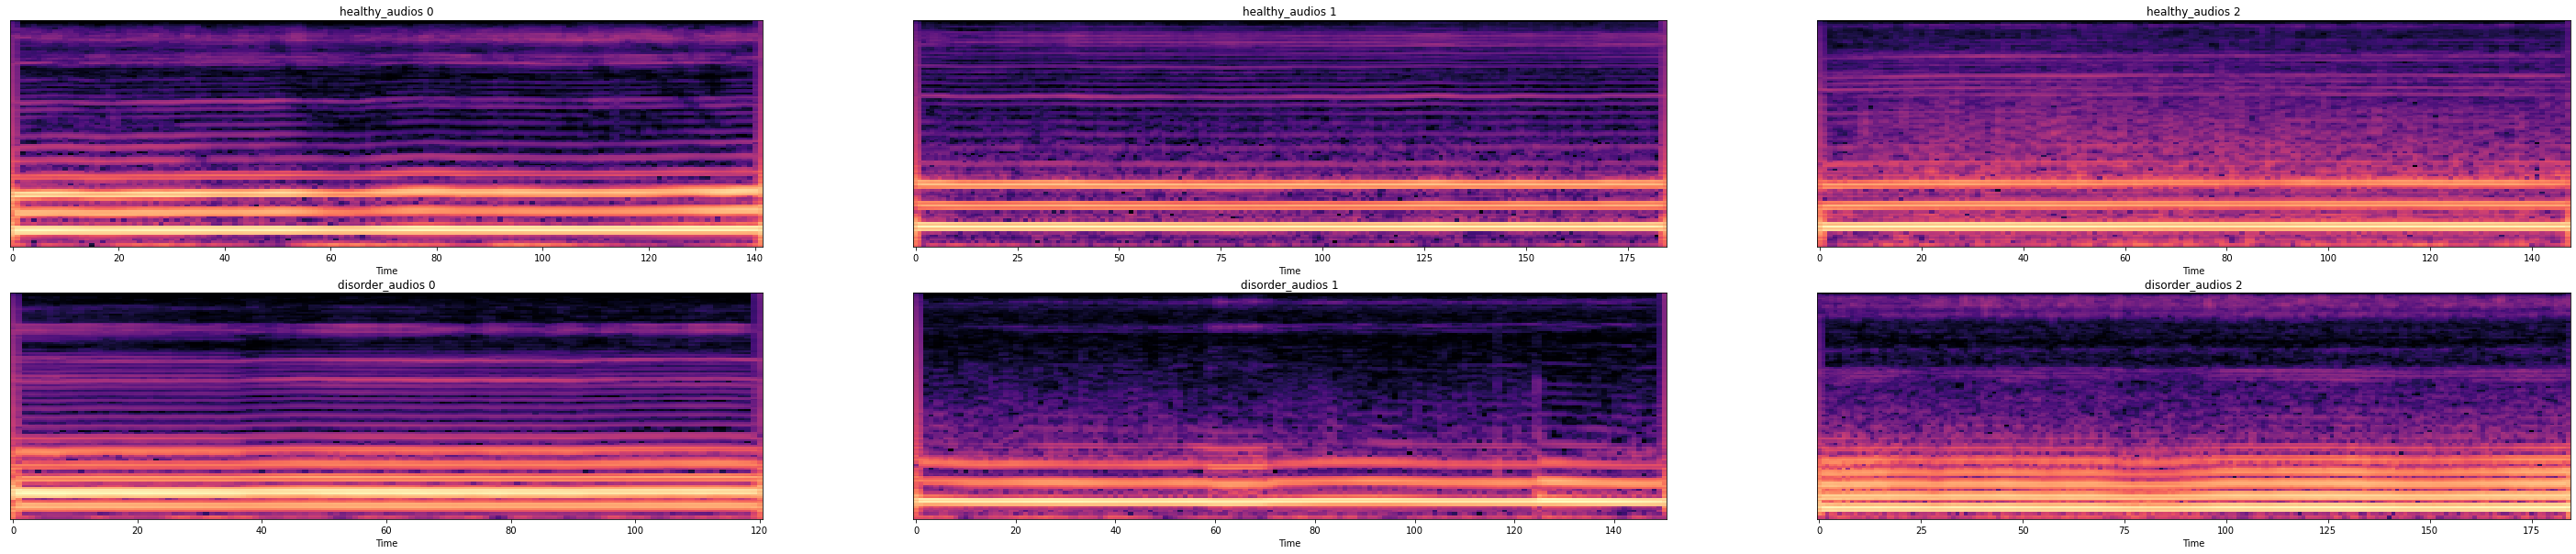

In [136]:
pltsize = 5
plt.figure(figsize=(10*pltsize,pltsize*2))#하나당 50,5

for i in range(3):
    plt.subplot(2,3,i+1)
    sr=16000
    win_length =  np.int64(16000/40) #
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("healthy_audios "+str(i))

for i in range(3):
    plt.subplot(2,3,i+3+1)
    sr=16000
    win_length =  np.int64(16000/40) # 1250
    n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
    hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

    stft = librosa.stft(disorder_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


    #D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
    S = librosa.core.power_to_db(S,ref=np.max)

    librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
    plt.xlabel("Time")
    plt.title("disorder_audios "+str(i))

In [6]:
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
import torchvision.models as models
import torchaudio
import torchaudio.transforms as T
import librosa
import numpy as np

In [36]:
win_length =  np.int64(16000/40) # 400
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 w

mel_scale = T.MelSpectrogram(
            sample_rate=16000,
            n_fft=400,
            win_length=400,
            hop_length=160,
            n_mels=128,
            center=True,
            pad_mode="constant",
            power=2.0,
            f_max=8000,
            norm="slaney",
            mel_scale="slaney",
            window_fn=torch.hann_window
    )

mel_scale = T.MelSpectrogram(
    sample_rate=16000,
    n_fft=1024,
    win_length=1024,
    hop_length=256,
    n_mels=80,
    f_min=0,
    f_max=8000,
    power=1.0,
    wkwargs={"periodic":False},
    window_fn=torch.hann_window
)

get_spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=n_fft,
    hop_length=hop_length,
    center=True,
    pad_mode="constant",
    power=2.0)

# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=win_length,
#             win_length=win_length,
#             hop_length=hop_length,
#             n_mels=128,
#             center=True,
#             pad_mode="constant",
#             power=2.0,
#             norm="slaney",
#             mel_scale="slaney",
#             window_fn=torch.hann_window
#     )
# mel_scale = T.MelSpectrogram(
#             sample_rate=16000,
#             n_fft=1024,
#             win_length=1024,
#             hop_length=512,
#             n_mels=128,
#             power=2.,
#     )


power_to_db = T.AmplitudeToDB(stype="power",top_db=80)

def take_log(feature):
    amp2db = torchaudio.transforms.AmplitudeToDB(stype="amplitude")
    amp2db.amin=1e-5
    return amp2db(feature).clamp(min=-50,max=80)

In [8]:
sig_mel.shape

NameError: name 'sig_mel' is not defined

torch.Size([80, 156])


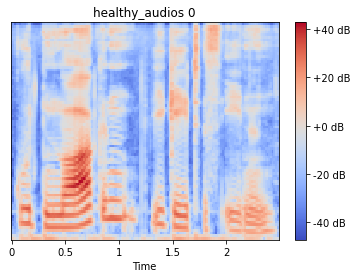

In [41]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
print(sig_mel.size())
sig_mel=take_log(sig_mel)
#sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )

sig_mel=sig_mel.cpu().numpy()
sig_mel=sig_mel.squeeze()
#sig_mel=librosa.core.power_to_db(sig1_mel,ref=np.max)

librosa.display.specshow(sig_mel, sr=16000, hop_length=256,x_axis='time')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

torch.Size([201, 397])


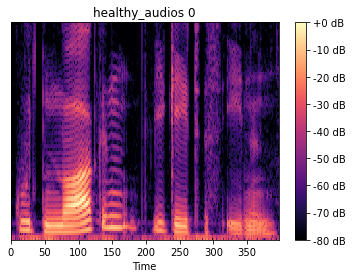

In [42]:
sig=torch.from_numpy(healthy_audios[0]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=get_spectrogram(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )
print(sig_mel.size())
sig_mel=sig_mel.cpu().numpy()
sig_mel=sig_mel.squeeze()

#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel[:100,:], sr=16000, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

In [9]:
sig=torch.from_numpy(healthy_audios[1]).type(torch.float32)# 타입 변화
#sig,sr = torchaudio.load('D:/project/voice_pathology_ai/voice_data/organics_ver2/healthy/phrase/export/946-phrase.wav')
#sig = T.Resample(sr,16000)(sig)
sig_mel=get_spectrogram(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(max( [torch.max(sig_mel),1e-10] ) ) )

NameError: name 'get_spectrogram' is not defined

In [63]:
sig_mel.tile((1,2))

torch.Size([201, 412])

In [19]:
sig_mel.shape

(128, 249)

In [131]:
length = sr*3 #sample rate *2 padding을 위한 파라미터 (하이퍼 파라미터로인해 사이즈는 계속 바뀐다.)
pad1d = lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        

In [187]:
sig.size()

torch.Size([2, 48000])

torch.Size([2, 128, 301])


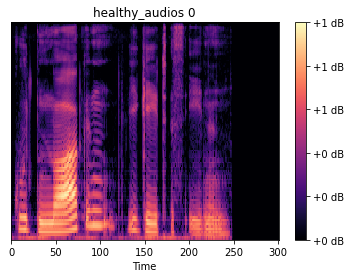

In [204]:
def batch_min_max(batch):
    print(batch.size())
    batch_size,height,width = batch.size(0),batch.size(1),batch.size(2)
    batch = batch.contiguous().view(batch.size(0), -1)
    batch -= batch.min(1, keepdim=True)[0]
    batch /= batch.max(1, keepdim=True)[0]
    batch = batch.view(batch_size, height, width)
    return batch

sig=torch.from_numpy(pad1d(healthy_audios[0],length) ).type(torch.float32)# 타입 변화
sig2=torch.from_numpy(pad1d(healthy_audios[1],length) ).type(torch.float32)# 타입 변화



sig = torch.stack([sig,sig2],dim=0)

sig_mel=mel_scale(sig)
#sig_mel=power_to_db(sig_mel)
sig_mel=torchaudio.functional.amplitude_to_DB(sig_mel,amin=1e-10,top_db=80,multiplier=10,db_multiplier=torch.log10(sig_mel.max()))

sig_mel = batch_min_max(sig_mel)
#power_to_db = T.AmplitudeToDB(stype="power",top_db=80)

#sig_mel = power_to_db(sig_mel)
sig_mel=sig_mel.cpu().numpy()
#sig_mel=librosa.core.power_to_db(sig_mel,ref=np.max)

librosa.display.specshow(sig_mel[0], sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(0))
plt.colorbar(format='%+2.0f dB')

In [190]:
sig_mel.shape

(2, 128, 301)

TypeError: max() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, int dim, bool keepdim, *, tuple of Tensors out)
 * (Tensor input, name dim, bool keepdim, *, tuple of Tensors out)


In [183]:
sig=torch.from_numpy(pad1d(healthy_audios[0],length) ).type(torch.float32)# 타입 변화
sig2=torch.from_numpy(pad1d(healthy_audios[1],length) ).type(torch.float32)# 타입 변화



sig = torch.stack([sig,sig2],dim=0)

sig_mel=mel_scale(sig)

sig_mel.amax(dim=[1,2])

tensor([48.3721, 27.2022])

In [170]:
sig_mel.amax(dim=[1,2])

torch.Size([2])

In [159]:
torch.max(sig_mel,dim=0)[0].size()

torch.Size([128, 301])

In [150]:
torch.min(sig_mel[0])

tensor(0.)

In [152]:
torch.max(sig_mel[1])

tensor(27.2022)

In [203]:

np.square(np.subtract(sig_mel[1],S)).mean()

0.0003555922606402903

In [102]:
print(S.min())
print(S.max())

-80.0
0.0


In [96]:
(sig_mel-S).sum()

218194.28

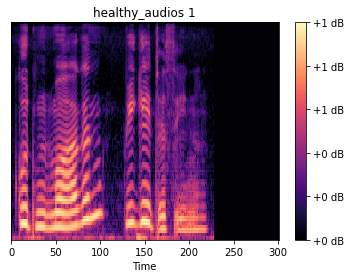

In [185]:
i=1
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

S = librosa.feature.melspectrogram(y = pad1d(healthy_audios[i],length),
                                            sr=sr,
                                            # hyp param
                                            n_mels = 128,
                                            n_fft = 400,
                                            win_length = 400,
                                            hop_length = 160,
                                            fmax = 8000,
                                            )

S = librosa.core.power_to_db(S,ref=np.max)
S = (S-S.min())/(S.max()-S.min())
librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))
plt.colorbar(format='%+2.0f dB')

MSE :  3.8325923e-10


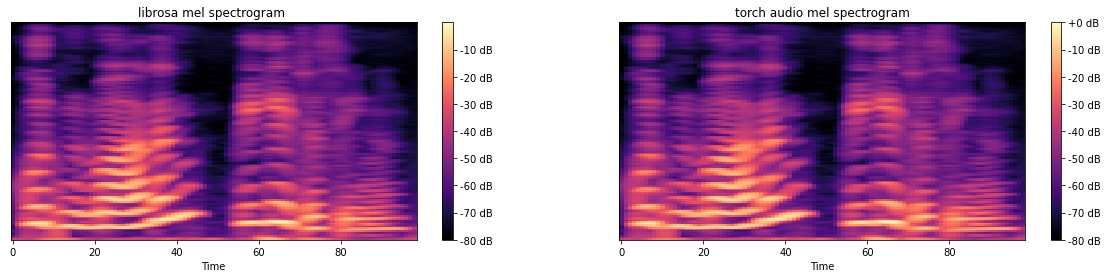

In [123]:
plt.figure(figsize=(10*2,2*2))#하나당 50,5

plt.subplot(1,2,1)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("librosa mel spectrogram ")
plt.colorbar(format='%+2.0f dB')


plt.subplot(1,2,2)
librosa.display.specshow(sig_mel, sr=16000, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("torch audio mel spectrogram")
plt.colorbar(format='%+2.0f dB')

print("MSE : ",np.square(np.subtract(sig_mel,S)).mean())

Text(0.5, 1.0, 'healthy_audios 0')

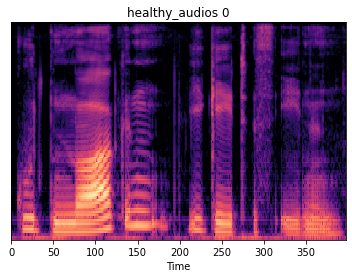

In [26]:
i=0
sr=16000
win_length =  np.int64(16000/40) #
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(healthy_audios[i], win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)

librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")
plt.title("healthy_audios "+str(i))

In [38]:
S.shape

(128, 249)

In [37]:
S.max()

0.0

In [54]:
sig_mel.min()

-80.0